# Pricing Test

### Goal
Pricing optimization is, non surprisingly, another area where data science can provide huge value.
The goal here is to evaluate whether a pricing test running on the site has been successful. As always, you should focus on user segmentation and provide insights about segments who behave differently as well as any other insights you might find.

### Challenge Description
Company XYZ sells a software for 39 USD. Since revenue has been flat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue. In the experiment, 66% of the users have seen the old price (39 USD), while a random sample of 33% users a higher price (59 USD).

The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users.

Especially she asked you the following questions:

(1) Should the company sell its software for 39 or 59 USD?

(2) The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

(3) [Bonus] The VP of Product feels that the test has been running for too long and he should have been able to get statistically significant results in a shorter time. 
Do you agree with her intuition? 
After how many days you would have stopped the test? Please, explain why.

# Import data

import libraries

In [8]:
import numpy as np
import pandas as pd
import os
import datetime as dt
import pandas_profiling

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(style = 'white', color_codes = True, font_scale = 1.8)

change to data directory import csv files as data frame 

In [10]:
os.chdir('/Users/mariaalejandrabarrios/Documents/0_DataScience/0_Insight/Data Challenge/Pricing_Test/')

data = pd.read_csv('test_results.csv', header = 0)
usr = pd.read_csv('user_table.csv', header = 0)

### Results table

In [5]:
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [6]:
pandas_profiling.ProfileReport(data)

Number of variables,8
Number of observations,316800
Total Missing (%),0.0%
Total size in memory,19.3 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,4
Date,0
Text (Unique),0
Rejected,1
Distinct count,2


let's double check that in fact all users in test paid 59 USD amd all users in control paid 39 USD, since will probably compare revenue, etc at some point

In [4]:
data.groupby('test').describe()

converted          price         user_id
test                                                    
0    count  202727.000000  202727.000000   202727.000000
     mean        0.019904      39.020718   499167.741613
     std         0.139669       0.643369   288616.565865
     min         0.000000      39.000000        9.000000
     25%         0.000000      39.000000   249557.000000
     50%         0.000000      39.000000   498452.000000
     75%         0.000000      39.000000   748995.500000
     max         1.000000      59.000000  1000000.000000
1    count  114073.000000  114073.000000   114073.000000
     mean        0.015543      58.972824   499483.228643
     std         0.123698       0.736735   288547.142025
     min         0.000000      39.000000        3.000000
     25%         0.000000      59.000000   249460.000000
     50%         0.000000      59.000000   500015.000000
     75%         0.000000      59.000000   749093.000000
     max         1.000000      59.000000   999995.000000

From above can see that price values are **NOT** unique for each group. 

Maybe mislabeling only for non-converted users?

In [5]:
print(data.price[(data.test ==0) & (data.converted ==1)].unique())
print(data.price[(data.test ==0) & (data.converted ==0)].unique())

print('')
print(data.price[(data.test ==1) & (data.converted ==1)].unique())
print(data.price[(data.test ==1) & (data.converted ==0)].unique())

[39 59]
[39 59]

[59 39]
[59 39]


Looks like there are users in test group that bought software for cheaper price, and users in control group that bought software for higher price. Apparently some mislabeling of the data, or start date of experiment is not first date. 

##### curious about how many of each are mislabeled: 

For control group most mislabeled data is for customers that did not convert

In [11]:
len(data)

316800

In [12]:
print(data.price[(data.price == 59) & (data.test ==0) & (data.converted ==0)].count())
print(data.price[(data.price == 59) & (data.test ==0) & (data.converted ==1)].count())

205
5


For test group most mislabeled data is for customers that did not convert as well

In [13]:
print(data.price[(data.price == 39) & (data.test ==1) & (data.converted ==0)].count())
print(data.price[(data.price == 39) & (data.test ==1) & (data.converted ==1)].count())

154
1


Since we are mostly concerned with customers who bought the software (i.e. converted), then removing mislabeled entries won't be of high impact, this is essentially only 6 users.  Total tally of users with mislabeled data = 365

In [14]:
# find mislabeled users and remove them from data frame
mislabeled_dat = data[ ((data.price == 39) & (data.test ==1)) | ((data.price == 59) & (data.test ==0))] 
mislabeled_dat.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted
1457,686486,2015-03-28 15:26:19,seo-other,mobile,android,1,39,0
1912,128338,2015-05-15 11:41:49,direct_traffic,mobile,android,1,39,0
2337,220590,2015-03-27 12:31:43,ads-google,web,windows,1,39,0
3147,246390,2015-05-30 08:29:44,direct_traffic,mobile,iOS,1,39,0
4277,906451,2015-04-05 11:09:18,ads-google,web,windows,1,39,0
8238,500863,2015-05-06 22:40:51,ads_other,mobile,iOS,0,59,0
8369,791541,2015-04-13 10:24:19,ads-bing,web,windows,0,59,0
11555,402699,2015-05-16 12:08:45,direct_traffic,mobile,other,0,59,0
11792,508012,2015-05-09 04:17:19,ads_other,web,windows,1,39,0
11975,166760,2015-03-27 21:22:22,ads_other,mobile,iOS,1,39,0


In [15]:
len(mislabeled_dat)

365

In [16]:
# drop above data that is incorrectly labeled
mask = data.isin(mislabeled_dat)
data = data[~mask]
data = data.dropna() # drop entries with NA now 

In [15]:
data.groupby('test').describe()

converted     price         user_id
test                                               
0.0  count  202517.000000  202517.0   202517.000000
     mean        0.019900      39.0   499177.321889
     std         0.139656       0.0   288614.108986
     min         0.000000      39.0        9.000000
     25%         0.000000      39.0   249556.000000
     50%         0.000000      39.0   498452.000000
     75%         0.000000      39.0   748987.000000
     max         1.000000      39.0  1000000.000000
1.0  count  113918.000000  113918.0   113918.000000
     mean        0.015555      59.0   499547.052634
     std         0.123747       0.0   288556.714324
     min         0.000000      59.0        3.000000
     25%         0.000000      59.0   249527.000000
     50%         0.000000      59.0   500075.000000
     75%         0.000000      59.0   749162.750000
     max         1.000000      59.0   999995.000000

In [16]:
len(data)

316435

OK, now all test ==1 have price 59 USD and all test ==0 have price 39 USD

In [17]:
# since converted is binary, mean is essentially the ratio of converted i.e. this shows 
# 1.9% conversion in control 
# 1.5% conversion in test

data.groupby('test').mean()

,user_id,price,converted
test,,,
0.0,499177.321889,39.0,0.019900
1.0,499547.052634,59.0,0.015555


### Users table

In [17]:
usr.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


Note tables are not 1:1, less users than results

In [18]:
print(len(data), len(usr))
print(len(data)-len(usr))

316435 275616
40819


duplicated users?

In [19]:
data.user_id[data.user_id.duplicated()].count()

0

In [20]:
len(data.user_id.unique())

316435

No duplicated users in data table; this means we have no location information for ~ 41,000 users

merge both tables on user_id

In [21]:
# doing left merge so that can keep as many users as possible...note this means we will not have 
# location data for many of the entries in the results table

dat = data.merge( usr, how= 'left', on = 'user_id')
dat.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839.0,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0.0,39.0,0.0,Buffalo,USA,42.89,-78.86
1,624057.0,2015-05-10 21:08:46,seo-google,mobile,android,0.0,39.0,0.0,Lakeville,USA,44.68,-93.24
2,317970.0,2015-04-04 15:01:23,ads-bing,mobile,android,0.0,39.0,0.0,Parma,USA,41.38,-81.73
3,685636.0,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1.0,59.0,0.0,Fayetteville,USA,35.07,-78.90
4,820854.0,2015-05-24 11:04:40,ads_facebook,web,mac,0.0,39.0,0.0,Fishers,USA,39.95,-86.02
5,169971.0,2015-04-13 12:07:08,ads-google,mobile,iOS,0.0,39.0,0.0,New York,USA,40.67,-73.94
6,600150.0,2015-03-04 14:45:44,seo_facebook,web,windows,0.0,39.0,0.0,NaN,NaN,NaN,NaN
7,798371.0,2015-03-15 08:19:29,ads-bing,mobile,android,1.0,59.0,1.0,East Orange,USA,40.77,-74.21
8,447194.0,2015-03-28 12:28:10,ads_facebook,web,windows,1.0,59.0,0.0,Dayton,USA,39.78,-84.20
9,431639.0,2015-04-24 12:42:18,ads_facebook,web,windows,1.0,59.0,0.0,Richmond,USA,37.53,-77.47


In [23]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316435 entries, 0 to 316434
Data columns (total 12 columns):
user_id             316435 non-null float64
timestamp           316435 non-null object
source              316435 non-null object
device              316435 non-null object
operative_system    316435 non-null object
test                316435 non-null float64
price               316435 non-null float64
converted           316435 non-null float64
city                275294 non-null object
country             275294 non-null object
lat                 275294 non-null float64
long                275294 non-null float64
dtypes: float64(6), object(6)
memory usage: 31.4+ MB


In [60]:
# looks like only US market [may want to double check, make sure this is not a logging issue; we saw logging issues 
# in data above related to price]
dat.country.unique()

array(['USA', nan], dtype=object)

In [24]:
T0=[dt.datetime.strptime(f[0:10], '%Y-%m-%d') for f in dat.timestamp]

In [25]:
dat['t'] = pd.to_datetime(T0)

In [26]:
# new time variable in days
dat['deldays'] = (dat.t-min(dat.t)).dt.days

In [27]:
# data spans over 90 days (for all data and checked taht such is that case for both the test and control group)
print('Data spans over',(max(T0)-min(T0)).days, 'days')
print('Data spans over',(max(dat.t[dat.test ==0])-min(dat.t[dat.test == 0])).days,'days for test group')
print('Data spans over',(max(dat.t[dat.test ==1])-min(dat.t[dat.test == 1])).days,'days for control group')

Data spans over 90 days
Data spans over 90 days for test group
Data spans over 90 days for control group


In [24]:
%matplotlib inline

#### Let's looks at some numbers

In [29]:
# percent of people in control group that converted 
conv_percnt_control = 100*dat.converted[(dat.test == 0) & (dat.converted == 1)].count()/ dat.converted[(dat.test == 0) ].count()
conv_percnt_test = 100*dat.converted[(dat.test == 1) & (dat.converted == 1)].count()/ dat.converted[(dat.test == 1) ].count()

print('% converted in control: ', conv_percnt_control)
print('% converted in test: ', conv_percnt_test)

# To think about: I am counting total... there may be a time componenet not account for here
# need to check that min-max time is the same for both, and/or do some type of rate: conversion per month

% converted in control:  1.98995639872
% converted in test:  1.55550483681


In [30]:
Tot_rev_control = dat.price[(dat.test == 0) & (dat.converted == 1)].sum()
Tot_rev_test = dat.price[(dat.test == 1) & (dat.converted == 1)].sum()
print('Renevue from control = $', Tot_rev_control)
print('Renevue from test = $', Tot_rev_control)

# 66% see old price, and 33% see new price

Renevue from control = $ 157170.0
Renevue from test = $ 157170.0


After cleaning data percent in each group is slightly different from original 66% and 33%

In [31]:
print(100* dat.test[dat.test ==1].count()/len(dat))
print(100* dat.test[dat.test ==0].count()/len(dat))

36.0004424289
63.9995575711


In [32]:
dat.groupby(['test','source','converted'])['converted','converted'].count()

converted  converted
test source          converted                      
0.0  ads-bing        0.0            14389      14389
                     1.0              195        195
     ads-google      0.0            36991      36991
                     1.0              854        854
     ads-yahoo       0.0             4731       4731
                     1.0               81         81
     ads_facebook    0.0            33268      33268
                     1.0              806        806
     ads_other       0.0            18959      18959
                     1.0              297        297
     direct_traffic  0.0            38189      38189
                     1.0              523        523
     friend_referral 0.0            12574      12574
                     1.0              547        547
     seo-bing        0.0             1289       1289
                     1.0               40         40
     seo-google      0.0            14824      14824
                     1.0              264        264
     seo-other       0.0             5776       5776
                     1.0              103        103
     seo-yahoo       0.0             4271       4271
                     1.0               85         85
     seo_facebook    0.0            13226      13226
                     1.0              235        235
1.0  ads-bing        0.0             8168       8168
                     1.0               79         79
     ads-google      0.0            21075      21075
                     1.0              422        422
     ads-yahoo       0.0             2728       2728
                     1.0               31         31
     ads_facebook    0.0            18956      18956
                     1.0              325        325
     ads_other       0.0            10439      10439
                     1.0              131        131
     direct_traffic  0.0            21342      21342
                     1.0              218        218
     friend_referral 0.0             7304       7304
                     1.0              253        253
     seo-bing        0.0              804        804
                     1.0               11         11
     seo-google      0.0             7931       7931
                     1.0              129        129
     seo-other       0.0             3323       3323
                     1.0               42         42
     seo-yahoo       0.0             2459       2459
                     1.0               26         26
     seo_facebook    0.0             7617       7617
                     1.0              105        105

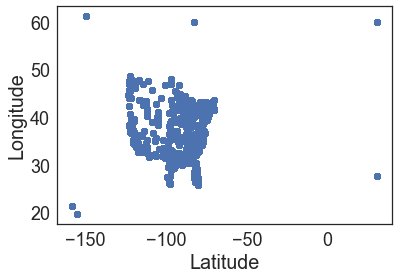

In [29]:
st_pete_russia = (dat['city'] == 'Saint Petersburg')
dat.loc[st_pete_russia, 'lat'] = 27.75
dat.loc[st_pete_russia, 'long'] = -82.63

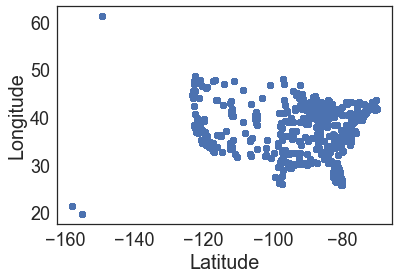

In [30]:
plt.plot(dat.long, dat.lat, 'bo')
plt.ylabel('Longitude')
plt.xlabel('Latitude')

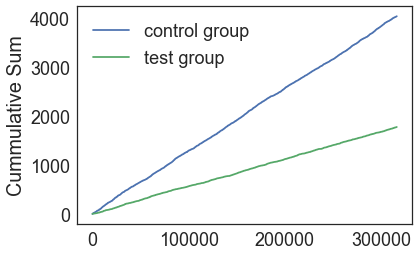

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot( dat.converted[(dat.test ==0)].cumsum(), 'b', label='control group')
ax.plot( dat.converted[dat.test ==1].cumsum(), 'g', label = 'test group')
ax.set_ylabel('Cummulative Sum')
ax.legend()

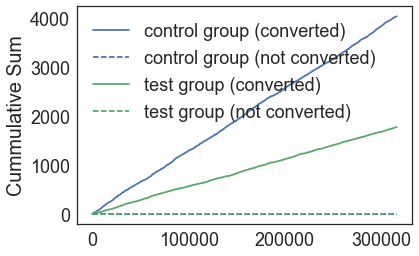

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot( dat.converted[(dat.test ==0) & (dat.converted == 1)].cumsum(), 'b', label='control group (converted)')
ax.plot( dat.converted[(dat.test ==0) & (dat.converted == 0)].cumsum(), '--b', label='control group (not converted)')
ax.plot( dat.converted[(dat.test ==1) & (dat.converted == 1)].cumsum(), 'g', label = 'test group (converted)')
ax.plot( dat.converted[(dat.test ==1) & (dat.converted == 0)].cumsum(), '--g', label = 'test group (not converted)')
ax.set_ylabel('Cummulative Sum')
ax.legend()

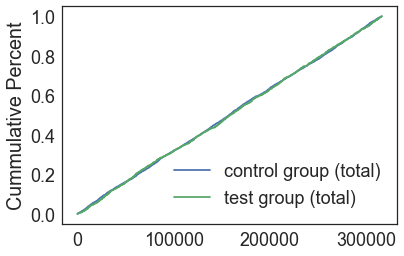

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dat.converted[dat.test ==0].cumsum()/(dat.converted[dat.test ==0].sum()), 'b', label='control group (total)')
ax.plot(dat.converted[dat.test ==1].cumsum()/(dat.converted[dat.test ==1].sum()), 'g', label='test group (total)')
ax.set_ylabel('Cummulative Percent')
ax.legend()

In [57]:
def bar_plot_dat(col, fig_sz):
     
    opts=sorted(dat[col].unique().tolist())

    n_groups = len(opts)
    per_unit = dat.price.unique().tolist()
    
    # define data frame 
    tmp = dat.groupby([col, 'converted','test'])['converted'].count().to_frame(name = 'cnt').reset_index()

    # choose counts for converted for test = 1 
    a=np.asarray(tmp.cnt[(tmp.test == 1) & (tmp.converted == 1)].tolist())
    rev_a = a*max(per_unit)
    
    # choose counts for converted for test = 0 
    b=np.asarray(tmp.cnt[(tmp.test == 0) & (tmp.converted == 1)].tolist())
    rev_b = b*min(per_unit)
    
    # total counts for both groups 
    df2 = tmp.groupby(['test',col])['cnt'].sum().to_frame(name='tot').reset_index()

    # percentages for each
    a_tot=np.asarray(df2.tot[df2.test == 1].tolist())
    b_tot=np.asarray(df2.tot[df2.test == 0].tolist())
    
    # some fields have zero conversion ... here I am assuming only 1 field :/
    test1=tmp[col][(tmp.test == 1) &(tmp.converted ==0)].unique().tolist()
    test2=tmp[col][(tmp.test == 1) &(tmp.converted ==1)].unique().tolist()
    if (len (test1) != len(test2)):
        ii_zero=min([ i for i in np.arange(min([len(test1), len(test2)])) if test1[i] != test2[i]])
        a = np.insert(a, ii_zero, 0)
        rev_a  = np.insert(rev_a , ii_zero, 0)
        if len(test2) > len(test1):
            lbl=test2[ii_zero]
        else: 
            lbl=test1[ii_zero]
        print('No converted for: ',lbl)

    Percnt_a = 100.*(a/a_tot)
    Percnt_b = 100*(b/b_tot)
    
    # maybe better to show $ per visit intead of tot revenue
    rev_a =  rev_a/a_tot
    rev_b =  rev_b/b_tot
    
    fig, ax = plt.subplots(figsize = fig_sz)

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    #error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, Percnt_b, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Control')

    rects2 = plt.bar(index + bar_width, Percnt_a, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Test')

    plt.xlabel(col)
    plt.ylabel('% Converted')
    plt.xticks(index + bar_width / 2, opts, rotation=70)
    plt.ylim((0, 1.2*max([max(Percnt_b), max(Percnt_a)])))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),loc='best', ncol=2, mode="expand", borderaxespad=0.)
    [plt.text(index[f]-(bar_width/2), 1.05*Percnt_b[f],  '$ %0.2f' % rev_b[f] ,fontsize =14 ) for f in range(len(opts))]
    [plt.text(index[f]+(bar_width/2), 1.05*Percnt_a[f],  '$ %0.2f' % rev_a[f] ,fontsize =14 ) for f in range(len(opts))]

    #plt.tight_layout()
    plt.show()

In [117]:
def bar_plot_dat_city(TopX_n, fig_sz):
    
    TopX = city_only.sort_values('num', ascending = False).head(TopX_n)
    TopX = TopX.city.unique().tolist()
    
    dat_sub = dat[dat.city.isin(TopX)]
    
    opts=TopX

    n_groups = len(opts)
    per_unit = dat.price.unique().tolist()
    
    col = 'city'
    
    # define data frame 
    tmp = dat_sub.groupby([col, 'converted','test'])['converted'].count().to_frame(name = 'cnt').reset_index()

    # choose counts for converted for test = 1 
    a=np.asarray(tmp.cnt[(tmp.test == 1) & (tmp.converted == 1)].tolist())
    rev_a = a*max(per_unit)
    
    # choose counts for converted for test = 0 
    b=np.asarray(tmp.cnt[(tmp.test == 0) & (tmp.converted == 1)].tolist())
    rev_b = b*min(per_unit)
    
    # total counts for both groups 
    df2 = tmp.groupby(['test',col])['cnt'].sum().to_frame(name='tot').reset_index()

    # percentages for each
    a_tot=np.asarray(df2.tot[df2.test == 1].tolist())
    b_tot=np.asarray(df2.tot[df2.test == 0].tolist())
    
    # some fields have zero conversion ... here I am assuming only 1 field :/
    test1=tmp[col][(tmp.test == 1) &(tmp.converted ==0)].unique().tolist()
    test2=tmp[col][(tmp.test == 1) &(tmp.converted ==1)].unique().tolist()
    if (len (test1) != len(test2)):
        ii_zero=min([ i for i in np.arange(min([len(test1), len(test2)])) if test1[i] != test2[i]])
        a = np.insert(a, ii_zero, 0)
        rev_a  = np.insert(rev_a , ii_zero, 0)
        if len(test2) > len(test1):
            lbl=test2[ii_zero]
        else: 
            lbl=test1[ii_zero]
        print('No converted for: ',lbl)

    Percnt_a = 100.*(a/a_tot)
    Percnt_b = 100*(b/b_tot)
    
    # maybe better to show $ per visit intead of tot revenue
    rev_a =  rev_a/a_tot
    rev_b =  rev_b/b_tot
    
    fig, ax = plt.subplots(figsize = fig_sz)

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    #error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, Percnt_b, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Control')

    rects2 = plt.bar(index + bar_width, Percnt_a, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Test')

    plt.xlabel(col)
    plt.ylabel('% Converted')
    plt.xticks(index + bar_width / 2, opts, rotation=70)
    plt.ylim((0, 1.2*max([max(Percnt_b), max(Percnt_a)])))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),loc='best', ncol=2, mode="expand", borderaxespad=0.)
    [plt.text(index[f]-(bar_width/2), 1.05*Percnt_b[f],  '$ %0.2f' % rev_b[f] ,fontsize =14 ) for f in range(len(opts))]
    [plt.text(index[f]+(bar_width/2), 1.05*Percnt_a[f],  '$ %0.2f' % rev_a[f] ,fontsize =14 ) for f in range(len(opts))]

    #plt.tight_layout()
    plt.show()

#### values on top of bars are USD per site visit

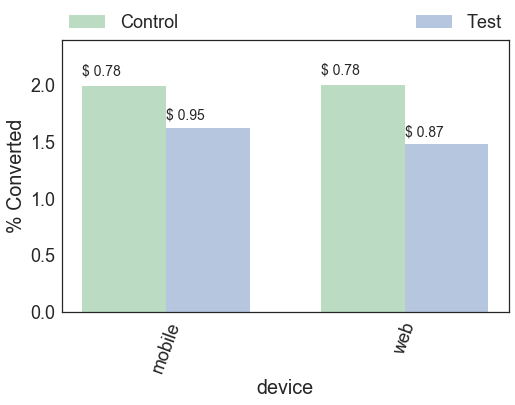

In [58]:
bar_plot_dat('device', (8,5))

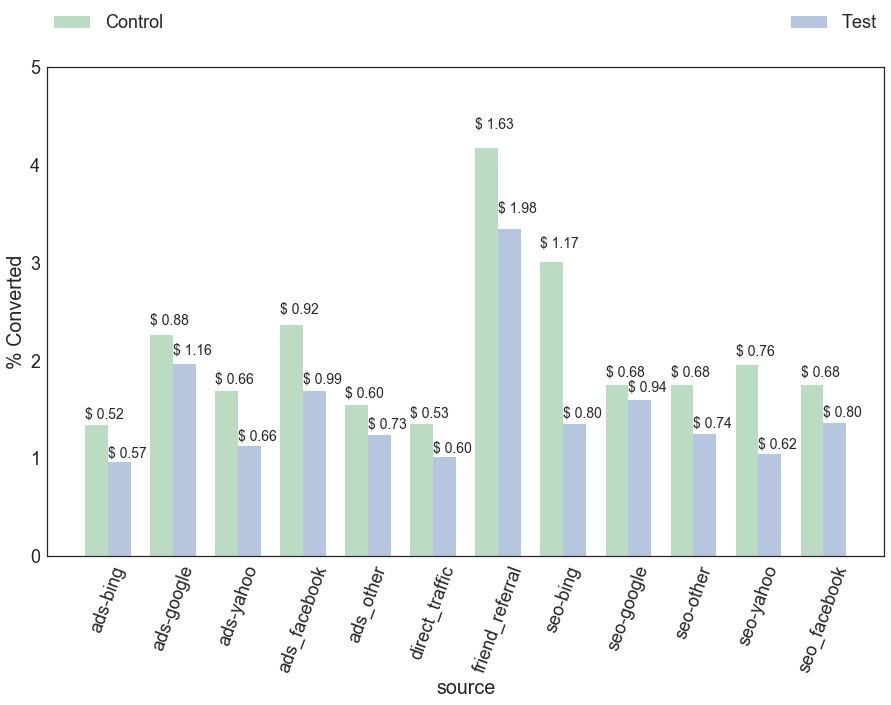

In [55]:
bar_plot_dat('source', (15,9))

#### Note no converted costumers for test group on linux platform, may want to check if this is a logging issue as well

No converted for:  linux


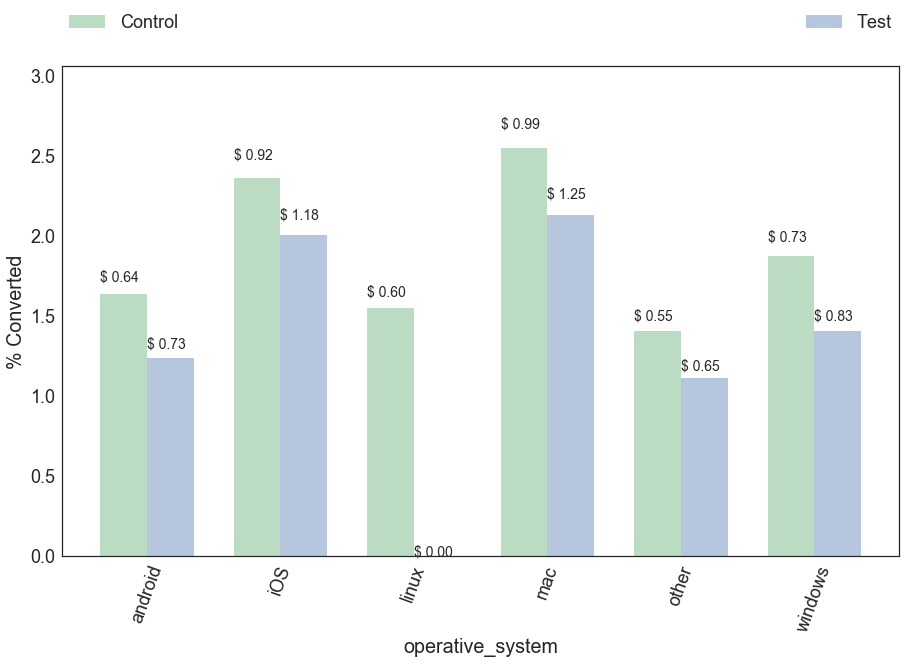

In [59]:
bar_plot_dat('operative_system', (15,9))

In [75]:
city_only = dat.groupby('city')['converted'].sum().to_frame(name = 'num').reset_index()
city_only.head(10)

,city,num
0,Abilene,8.0
1,Akron,7.0
2,Alameda,2.0
3,Albany,6.0
4,Albuquerque,0.0
5,Alexandria,3.0
6,Alhambra,0.0
7,Aliso Viejo,4.0
8,Allen,2.0
9,Allentown,5.0


Look at top 15 cities (based on total convetion)

In [116]:
city_only.sort_values('num', ascending = False).head(10)

,city,num
552,New York,443.0
376,Houston,120.0
155,Chicago,101.0
723,San Antonio,85.0
468,Los Angeles,79.0
39,Austin,63.0
730,San Jose,58.0
629,Philadelphia,46.0
385,Indianapolis,45.0
394,Jacksonville,45.0


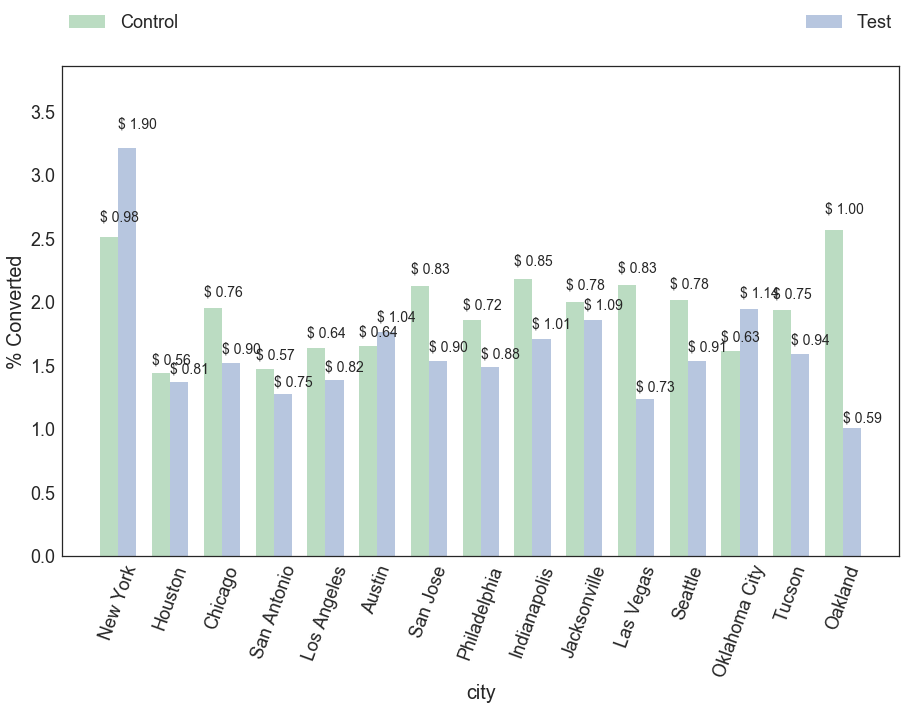

In [118]:
bar_plot_dat_city(15, (15,9))

# Findings

Selling the softwar at 39 USD or 59 USD depends on what the aim for the company is. Across all fields there is larger conversion % is the software price is 39 USD. If the company wants to increase their user base, I woudl recommend keeping the price at 39 USD. On the other hand if the goal is to increase revenue, then increasing the price to 59 USD is reasonable. Although there is a lower conversion rate at 59 USD, the price per visit is slightly hihger in most cases. 

Referals from fiends has the highest convertion rate at either price, I recommend the company place close attention to this source or renevue and/or invest in asuring users are referring product more. I noticed thre are no convertions for linux users at the higher price, maybe worth checking if this is a logging issue. If it is not, this is telling us we are alianating en entire group of potential costumers by increasing the price of the softwars. This is important to keep in mind.  

If more time was available I would take a closer look at the behavior of convertion between test and control as a function of time to see if additioanl insight coudl be gained from that. In particular to inform the PM if in fact experiment could be shortened from 90 dyas. 